### 此例使用高斯白雜訊(AWGN)來產生錯誤, 將ANcode對比通道碼(ex:Hamming_code)

In [1]:
import numpy as np
from numpy.random import rand, randn, randint
import random
import matplotlib.pyplot as plt
from numpy import sqrt

## Single AWE ANcode Decoder(A=59)

In [2]:
def A59_AN_decoder(residue,quotient):
    s_re=str(residue)
    msg={
        "1": lambda quotient: quotient,
        "2": lambda quotient: quotient,
        "4": lambda quotient: quotient,
        "8": lambda quotient: quotient,
        "16": lambda quotient: quotient,
        "32": lambda quotient: quotient,
        "5": lambda quotient: quotient-1,
        "10": lambda quotient: quotient-2,
        "20": lambda quotient: quotient-4,
        "40": lambda quotient: quotient-8,
        "21": lambda quotient: quotient-17,
        "42": lambda quotient: quotient-34,
        "25": lambda quotient: quotient-69,
        "50": lambda quotient: quotient-138,
        "41": lambda quotient: quotient-277,
        "23": lambda quotient: quotient-555,
        "46": lambda quotient: quotient-1110,
        "33": lambda quotient: quotient-2221,
        "7": lambda quotient: quotient-4443,
        "14": lambda quotient: quotient-8886,
        "28": lambda quotient: quotient-17772,
        "56": lambda quotient: quotient-35544,
        "53": lambda quotient: quotient-71089,
        "47": lambda quotient: quotient-142179,
        "35": lambda quotient: quotient-284359,
        "11": lambda quotient: quotient-568719,
        "22": lambda quotient: quotient-1137438,
        "44": lambda quotient: quotient-2274876,
        "29": lambda quotient: quotient-4549753,
        "58": lambda quotient: quotient+1,
        "57": lambda quotient: quotient+1,
        "55": lambda quotient: quotient+1,
        "51": lambda quotient: quotient+1,
        "43": lambda quotient: quotient+1,
        "27": lambda quotient: quotient+1,
        "54": lambda quotient: quotient+2,
        "49": lambda quotient: quotient+3,
        "39": lambda quotient: quotient+5,
        "19": lambda quotient: quotient+9,
        "38": lambda quotient: quotient+18,
        "17": lambda quotient: quotient+35,
        "34": lambda quotient: quotient+70,
        "9": lambda quotient: quotient+139,
        "18": lambda quotient: quotient+278,
        "36": lambda quotient: quotient+556,
        "13": lambda quotient: quotient+1111,
        "26": lambda quotient: quotient+2222,
        "52": lambda quotient: quotient+4444,
        "45": lambda quotient: quotient+8887,
        "31": lambda quotient: quotient+17773,
        "3": lambda quotient: quotient+35545,
        "6": lambda quotient: quotient+71090,
        "12": lambda quotient: quotient+142180,
        "24": lambda quotient: quotient+284360,
        "48": lambda quotient: quotient+568720,
        "37": lambda quotient: quotient+1137439,
        "15": lambda quotient: quotient+2274877,
        "30": lambda quotient: quotient+4549754,
        "0" :lambda quotient: quotient,
    }[s_re](quotient)
    msg
    return int(msg)


def Barret_q_59(x):
    x = np.int64(x)
    q = (x * 284359) >> 24       ## (2^24)//59後, 右移24次         
    r = x - q * 59
    if r < 59:
        return (r,q)
    else:
        return (r - 59, q + 1)

In [3]:
# 傳遞資料為0~262143(18-bits)的無號數整數
message=[]
message_count=12000000
for i in range(message_count):
    message.append(random.randint(0,262143))
    
## A=53乘積編碼
codeword59=[]
for element in message:
    codeword59.append(element*59)
    
#turn *59 into binary
codeword59_bin=[]
for ele in codeword59:
    s='{0:024b}'.format(ele)
    codeword59_bin.append(s)
#codeword59_bin

#can be replaced by np.reshape
bit59_part=[]
for c_bin in codeword59_bin:
    for single_bit in c_bin:
            bit59_part.append(int(single_bit))
            
tran59=[]
for b in bit59_part:
    if b==1:
        tran59.append(1)
    else:
        tran59.append(0)

In [4]:
N = message_count*24
EbNodB_range = range(0,19)
itr = len(EbNodB_range)
print(itr)
ber = [None]*itr
uncode_ber=[None]*itr
uncode_bler=[None]*itr
bler=[None]*itr

two_d_array_bler59=[None]*itr
q_ber59=[None]*itr

## uncode_bit = 2 * (rand(N) >= 0.5) - 1
## print(np.size(uncode_bit))
## print(np.size(tran59))


19


In [5]:
print(np.size(tran59))

288000000


In [6]:
#transmission part 
for n in range (0, itr): 
    EbNodB = EbNodB_range[n]   
    EbNo=10.0**(EbNodB/10.0)
    #input
    x59=tran59  
    
    #AWGN
    noise_std = 1/sqrt(2*EbNo)
    uncode_bit_noise= x59 + noise_std * randn(N)

    ######  receive  for uncode_bit_noise ##########   
    receive59=[]
    for receive_bit in uncode_bit_noise:
        if(receive_bit >= 0.5):
            receive59.append(1)
        else:
            receive59.append(0)
    ################################################   
    

    #reshape
    temp59 = np.reshape(receive59, (message_count,24))
    #bit to decimal
    receive59_decimal = []
    

    for ele in temp59:
        int_out=0
        for ind,val in enumerate (ele):        
            int_out=2**(23-ind)*val+int_out
        receive59_decimal.append(int_out)

    # 2d array 
    decode59_num_msg=[]
    decode59_num_codeword=[]
    q59_check_list=[]
    #10x10x2 array
    for i in range(message_count//100):
        receive59_decimal_100=[]
        receive59_decimal_100=receive59_decimal[0+100*i:100+100*i]

        rq_table=np.zeros((10,10,2),int)
        
        r59_list=[]
        q59_list=[]

        for ele in receive59_decimal_100:
            r,q=Barret_q_59(ele)
            r59_list.append(r)
            q59_list.append(q)

            q59_check_list.append(q)
            
        #put r,q into 3d rq array table
        for i in range(100):
            rq_table[i//10,i%10]=[r59_list[i],q59_list[i]]  

        error59_row=[]
        error59_col=[]
        for i in range(10):
            s_r59=sum(rq_table[i,:,0]) #sum of residue at i row
            s_c59=sum(rq_table[:,i,0]) #sum of residue at i colunm
            error59_row.append(s_r59)
            error59_col.append(s_c59)
        #turn into true false
        for ind,val in enumerate(error59_row):
            if(val!=0):
                error59_row[ind]=True
            else:
                error59_row[ind]=False

        for ind,val in enumerate(error59_col):
            if(val!=0):
                error59_col[ind]=True
            else:
                error59_col[ind]=False
        #find error location and return the first value to ANdecoder
        true_false_table59_for_row_col=np.zeros((10,10),bool)
        # row and colunm to find error location
        for i in range(10):
            for j in range(10):
                true_false_table59_for_row_col[i,j]=error59_row[i] and error59_col[j]

        true_false_table59_for_row_col=true_false_table59_for_row_col.reshape(100,1)
        error_index_from_TF59_table=-1
        #find the fisrt error location and return index value to ANdecoder
        for ind,ele in enumerate(true_false_table59_for_row_col):
            if(ele):
                error_index_from_TF59_table=ind
                break

        if(error_index_from_TF59_table==-1):
            decode59_msg100=q59_list
            decode59_num_msg.extend(decode59_msg100)
            #print(len(decode59_num_msg),"no error")
        else:
            #correct the error value and return msg
            error_codeword=receive59_decimal_100[error_index_from_TF59_table]
            r,q=Barret_q_59(error_codeword)
            corrected_value=A59_AN_decoder(r,q)
            q59_list[ind]=corrected_value
            decode59_msg100=q59_list
            decode59_num_msg.extend(decode59_msg100)
            #print(len(decode59_num_msg),"error")
    

   
    ## 2d BLER #########################
    BLER59_ERROR=0
    for c in range(len(decode59_num_msg)):
        if(decode59_num_msg[c] !=message[c]):
            BLER59_ERROR=BLER59_ERROR+1  
    two_d_array_bler59[n] =1.0 * BLER59_ERROR / message_count
    ########################################
    #uncode BLER
    uncode_error=0
    for b in range(message_count):
        if np.any(receive59_decimal[b] != codeword59[b]):
            uncode_error = uncode_error + 1  
    uncode_bler[n] =1.0 * uncode_error / message_count
    ## uncode BER
    uncode_ber_error = 0
    uncode_ber_error = sum(a != b for a, b in zip(x59, receive59))
    uncode_ber[n]= 1.0 * uncode_ber_error / N
    ########################################
    q59_num=0
    for i in range(len(decode59_num_msg)):
        if(message[i]!=q59_check_list[i]):
            q59_num=q59_num+1

    q_ber59[n]=1.*q59_num/len(decode59_num_msg)
    



    
    print ("EbNodB:", EbNodB)
    print("Uncoded BLER:", uncode_bler[n])
    print("Uncoded BER:", uncode_ber[n])
    print ("BLER without decoder:", q_ber59[n] )
    print ("BLER with decoder A=59:", two_d_array_bler59[n] )

EbNodB: 0
Uncoded BLER: 0.9986179166666667
Uncoded BER: 0.23974016666666667
BLER without decoder: 0.9953264166666667
BLER with decoder A=59: 0.9952360833333334
EbNodB: 1
Uncoded BLER: 0.9968914166666667
Uncoded BER: 0.21379928819444444
BLER without decoder: 0.9913565833333333
BLER with decoder A=59: 0.9911691666666667
EbNodB: 2
Uncoded BLER: 0.9929765
Uncoded BER: 0.18668924652777777
BLER without decoder: 0.98367
BLER with decoder A=59: 0.9833233333333333
EbNodB: 3
Uncoded BLER: 0.98429425
Uncoded BER: 0.15893339583333332
BLER without decoder: 0.9690655
BLER with decoder A=59: 0.9684480833333333
EbNodB: 4
Uncoded BLER: 0.9658534166666667
Uncoded BER: 0.13120348958333333
BLER without decoder: 0.94211225
BLER with decoder A=59: 0.9410216666666666
EbNodB: 5
Uncoded BLER: 0.928805
Uncoded BER: 0.10426815972222223
BLER without decoder: 0.89430825
BLER with decoder A=59: 0.8925355
EbNodB: 6
Uncoded BLER: 0.8618709166666667
Uncoded BER: 0.07913590972222222
BLER without decoder: 0.816417666666

In [7]:
print(two_d_array_bler59)

[0.9952360833333334, 0.9911691666666667, 0.9833233333333333, 0.9684480833333333, 0.9410216666666666, 0.8925355, 0.8138943333333334, 0.6979710833333334, 0.5484469166666667, 0.38383125, 0.23204258333333333, 0.11767483333333334, 0.047189916666666665, 0.01165025, 0.0011394166666666666, 4.608333333333333e-05, 5.833333333333333e-07, 0.0, 0.0]


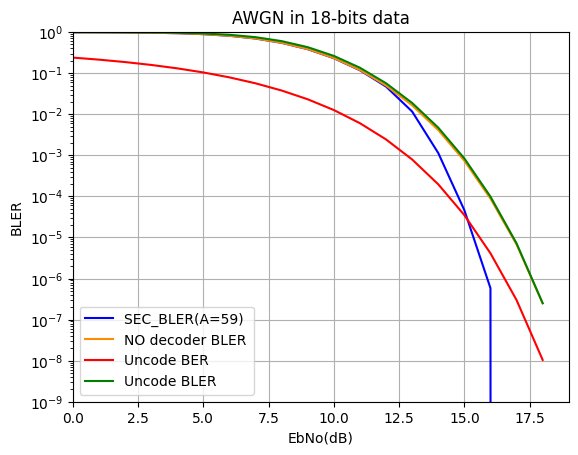

In [9]:
two_d_BLER59=plt.plot( EbNodB_range, two_d_array_bler59, 'b',label="SEC_BLER(A=59) ")
only_q59=plt.plot( EbNodB_range, q_ber59, color='#FF8C00',label="NO decoder BLER")
uncode_ber_line=plt.plot(EbNodB_range,uncode_ber,'r',label="Uncode BER")
uncode_bler_line=plt.plot(EbNodB_range,uncode_bler,'g',label="Uncode BLER")


#hamming_ber_line=plt.plot(EbNodB_range, hamming_ber, 'y',label="(7,4)hamming_ber")
plt.legend()
#plt.plot(EbNodB_range, an_decode_ber, 'b')
plt.axis([0, itr, 1e-9, 1])
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('EbNo(dB)')
plt.ylabel('BLER')
plt.grid(True)
plt.title('AWGN in 18-bits data')
plt.savefig("AWGN in 18bits SEC")
plt.show()

### 使用查找表更正
* Function Definition

In [10]:
import math
import numpy as np

def decimal_to_binary(decimal_number):
    if decimal_number == 0:
        return "0"
    # 處理正數：直接轉換
    if decimal_number > 0:
        return bin(decimal_number)[2:]  # 移除 "0b" 前綴
       # 處理負數：自動計算所需位元數（2's complement）
    abs_value = abs(decimal_number)
    bits = abs_value.bit_length() + 1  # 負數多一個符號位元
    two_complement_value = (1 << bits) + decimal_number
    
    return bin(two_complement_value)[2:]  # 移除 "0b" 前綴

def bits_needed(number):
    if number < 0:
        raise ValueError("2's complement is not available")  # 如果輸入負數，拋出錯誤
    if number == 0:
        return 1  # 0 需要 1 個位元
    
    # 計算位元數
    bits = math.floor(math.log2(number)) + 1
    return bits

def bits_range(bits, signed=False):     ## 可選擇設定 有號數 或 無號數
    if bits <= 0:
        return "位元數必須為正整數！"
    
    if signed:
        # 二補數範圍: -2^(bits-1) 到 2^(bits-1)-1
        min_value = -(2**(bits - 1))
        max_value = 2**(bits - 1) - 1
    else:
        # 無符號範圍: 0 到 2^bits - 1
        min_value = 0
        max_value = 2**bits - 1

    return min_value, max_value

## 把重複的 AWE 去除
def remove_duplicates(input_list):
    unique_list = []
    for number in input_list:
        if number not in unique_list:
            unique_list.append(number)
    return sorted(unique_list)

def custom_mod(a, b):
    if b == 0:
        return "錯誤：除數不能為零！"
    # 計算商和餘數，修正餘數計算邏輯
    quotient = a // b
    remainder = a - b * quotient
    # 修正負餘數的情況
    if remainder > 0 and a < 0:
        remainder -= abs(b)
        quotient += 1
    return remainder

def remainder_unique(input_list):
    # 使用集合判斷元素是否有重複
    return len(input_list) == len(set(input_list))


def create_mapping(source_list, address_map):
    """
    建立值到位址和位址到值的雙向映射。
    若 address_map 中某位址沒有對應值，則該位址的值為 0。
    
    參數:
    source_list (list): 原始資料列表。
    address_map (list): 位址映射列表。
    
    回傳:
    tuple: (值到位址的映射, 位址到值的映射)
    """
    # 初始化值到位址的映射
    value_to_address = {value: addr for value, addr in zip(source_list, address_map)}
    
    # 初始化位址到值的映射，未指定的位址預設為 0
    max_address = max(address_map)  # 確保涵蓋所有位址
    address_to_value = {addr: 0 for addr in range(max_address + 1)}  # 預設為 0
    for value, addr in zip(source_list, address_map):
        address_to_value[addr] = value  # 更新有指定值的位址

    return value_to_address, address_to_value
def decimal_to_binary(decimal_number):
    if decimal_number == 0:
        return "0"
    # 處理正數：直接轉換
    if decimal_number > 0:
        return bin(decimal_number)[2:]  # 移除 "0b" 前綴
       # 處理負數：自動計算所需位元數（2's complement）
    abs_value = abs(decimal_number)
    bits = abs_value.bit_length() + 1  # 負數多一個符號位元
    two_complement_value = (1 << bits) + decimal_number
    
    return bin(two_complement_value)[2:]  # 移除 "0b" 前綴

def bits_needed(number):
    if number < 0:
        raise ValueError("2's complement is not available")  # 如果輸入負數，拋出錯誤
    if number == 0:
        return 1  # 0 需要 1 個位元
    
    # 計算位元數
    bits = math.floor(math.log2(number)) + 1
    return bits

def bits_range(bits, signed=False):     ## 可選擇設定 有號數 或 無號數
    if bits <= 0:
        return "位元數必須為正整數！"
    
    if signed:
        # 二補數範圍: -2^(bits-1) 到 2^(bits-1)-1
        min_value = -(2**(bits - 1))
        max_value = 2**(bits - 1) - 1
    else:
        # 無符號範圍: 0 到 2^bits - 1
        min_value = 0
        max_value = 2**bits - 1

    return min_value, max_value

## 把重複的 AWE 去除
def remove_duplicates(input_list):
    unique_list = []
    for number in input_list:
        if number not in unique_list:
            unique_list.append(number)
    return sorted(unique_list)

def custom_mod(a, b):
    if b == 0:
        return "錯誤：除數不能為零！"
    # 計算商和餘數，修正餘數計算邏輯
    quotient = a // b
    remainder = a - b * quotient
    # 修正負餘數的情況
    if remainder > 0 and a < 0:
        remainder -= abs(b)
        quotient += 1
    return remainder

def remainder_unique(input_list):
    # 使用集合判斷元素是否有重複
    return len(input_list) == len(set(input_list))


In [11]:
### 輸入數值為data, ANcode的A為AN
### 乘完A後的數值為 input
data = 262143
AN = 6311     ## AN:6311, 只適用輸入為0~262143
input = data*AN
bits = bits_needed(input)

### 1-bit AWE:
AWE_1=[]
e1=0     ## 錯誤數量
e1_data=[]
for i in range(0, bits):
    AWE_1.insert(e1 , input + 2**i)
    e1_data.insert(e1, 2**i)
    e1 = e1 + 1
    AWE_1.insert(e1 , input - 2**i)
    e1_data.insert(e1, -2**i)
    e1 = e1 + 1
    
### 2-bit AWE:
AWE_2=[]
e2=0     ## 錯誤數量
p=0      ## 錯誤位置
e2_data=[]
for i in range(0, bits):
    for j in range(i+1, bits):
        AWE_2.insert(e2 , (input + 2**i + 2**j))
        e2_data.insert(e2 , (2**i + 2**j))        
        print(f"第 {e2} 筆錯誤資料: {AWE_2[e2]}")
        print(f"第 {e2} 筆算術錯誤: {e2_data[e2]}")
        e2 = e2 + 1
        AWE_2.insert(e2 , (input + 2**i - 2**j))
        e2_data.insert(e2 , (2**i - 2**j))        
        print(f"第 {e2} 筆錯誤資料: {AWE_2[e2]}")
        print(f"第 {e2} 筆算術錯誤: {e2_data[e2]}")
        e2 = e2 + 1
        AWE_2.insert(e2 , (input - 2**i + 2**j))
        e2_data.insert(e2 , (-2**i + 2**j))                
        print(f"第 {e2} 筆錯誤資料: {AWE_2[e2]}")
        print(f"第 {e2} 筆算術錯誤: {e2_data[e2]}")
        e2 = e2 + 1
        AWE_2.insert(e2 , (input - 2**i -2**j))
        e2_data.insert(e2 , (-2**i - 2**j))
        print(f"第 {e2} 筆錯誤資料: {AWE_2[e2]}")
        print(f"第 {e2} 筆算術錯誤: {e2_data[e2]}")
        e2 = e2 + 1
        p = p + 1
        
## 把list:AWE_1 和 list:AWE_2合併
AWE = AWE_1 + AWE_2
e_total = e1_data + e2_data
## 把重複的 AWE 去除
new_AWE = remove_duplicates(AWE)
new_e_total = remove_duplicates(e_total)
AWE_count = np.size(new_AWE)
e_count = np.size(new_e_total)

### 模AN, 使用一般mod函數和 Barret reduction 比較
remainder = []
for m in range(0,AWE_count):
    mod = new_AWE[m] % AN
    remainder.append(mod)

print("錯誤資料對AN取完模數:\n",remainder)

##############################################################
### Barret reduction ###
def Barret_q_6311(x):
    x = np.int64(x)      
    q = (x * 340276 ) >> 31        ## (2^31)//6311後, 右移31次 
    r = x - q * 6311
    if r < 6311:
        return (r,q)
    else:
        return (r - 6311,q+1)
    
Barret_remainder = []
for m in range(0,AWE_count):
    Barret_r,Barret_q = Barret_q_6311(new_AWE[m])
    Barret_remainder.append(Barret_r)
    
print("Barret reduction對錯誤資料取完模數:\n",Barret_remainder)
print("Barret reduction是否可以使用:", Barret_remainder == remainder)
#################################################################
print("所有餘數(一般mod函數)是否完全相異:", remainder_unique(remainder))
print("所有餘數(Barret reduction)是否完全相異:", remainder_unique(Barret_remainder))
print("所有的AWE:\n", new_e_total)
print(np.size(remainder))

### 建立錯誤映射表(LUT)
## Decoder
AWE_to_remainder, remainder_to_AWE = create_mapping(new_e_total, Barret_remainder)

## example
example_r1 = Barret_remainder[0]
example_r2 = Barret_remainder[1]
print(f"輸入餘數 {example_r1}, 對應算術錯誤: {remainder_to_AWE[example_r1]}")
print(f"輸入餘數 {example_r2}, 對應算術錯誤: {remainder_to_AWE[example_r2]}")

Raw_data1 = new_AWE[0]-remainder_to_AWE[example_r1]
Raw_data2 = new_AWE[1]-remainder_to_AWE[example_r2]
print(Raw_data1)
print(Raw_data2)
print("更正是否正確:", input == Raw_data1)

第 0 筆錯誤資料: 1654384476
第 0 筆算術錯誤: 3
第 1 筆錯誤資料: 1654384472
第 1 筆算術錯誤: -1
第 2 筆錯誤資料: 1654384474
第 2 筆算術錯誤: 1
第 3 筆錯誤資料: 1654384470
第 3 筆算術錯誤: -3
第 4 筆錯誤資料: 1654384478
第 4 筆算術錯誤: 5
第 5 筆錯誤資料: 1654384470
第 5 筆算術錯誤: -3
第 6 筆錯誤資料: 1654384476
第 6 筆算術錯誤: 3
第 7 筆錯誤資料: 1654384468
第 7 筆算術錯誤: -5
第 8 筆錯誤資料: 1654384482
第 8 筆算術錯誤: 9
第 9 筆錯誤資料: 1654384466
第 9 筆算術錯誤: -7
第 10 筆錯誤資料: 1654384480
第 10 筆算術錯誤: 7
第 11 筆錯誤資料: 1654384464
第 11 筆算術錯誤: -9
第 12 筆錯誤資料: 1654384490
第 12 筆算術錯誤: 17
第 13 筆錯誤資料: 1654384458
第 13 筆算術錯誤: -15
第 14 筆錯誤資料: 1654384488
第 14 筆算術錯誤: 15
第 15 筆錯誤資料: 1654384456
第 15 筆算術錯誤: -17
第 16 筆錯誤資料: 1654384506
第 16 筆算術錯誤: 33
第 17 筆錯誤資料: 1654384442
第 17 筆算術錯誤: -31
第 18 筆錯誤資料: 1654384504
第 18 筆算術錯誤: 31
第 19 筆錯誤資料: 1654384440
第 19 筆算術錯誤: -33
第 20 筆錯誤資料: 1654384538
第 20 筆算術錯誤: 65
第 21 筆錯誤資料: 1654384410
第 21 筆算術錯誤: -63
第 22 筆錯誤資料: 1654384536
第 22 筆算術錯誤: 63
第 23 筆錯誤資料: 1654384408
第 23 筆算術錯誤: -65
第 24 筆錯誤資料: 1654384602
第 24 筆算術錯誤: 129
第 25 筆錯誤資料: 1654384346
第 25 筆算術錯誤: -127
第 26 筆錯誤資料: 1654384600
第 26 筆

## 使用查找表更正2-bits Error 的BLER

In [12]:
# 傳遞資料為0~262143(18-bits)的無號數整數
message=[]
message_count=12000000
for i in range(message_count):
    message.append(random.randint(0,262143))

## DEC_AN=6311乘積編碼
codeword6311=[]
for element in message:
    codeword6311.append(element*6311)
    
#turn *6311 into binary
codeword6311_bin=[]
for ele in codeword6311:
    s='{0:031b}'.format(ele)
    codeword6311_bin.append(s)
#codeword6311_bin


#can be replaced by np.reshape
bit6311_part=[]
for c_bin in codeword6311_bin:
    for single_bit in c_bin:
            bit6311_part.append(int(single_bit))
#transmition bit
tran6311=[]
for b in bit6311_part:
    if b==1:
        tran6311.append(1)
    else:
        tran6311.append(0)


In [14]:
N = message_count*31
EbNodB_range = range(0,19)
itr = len(EbNodB_range)
print(itr)
ber = [None]*itr
uncode_ber=[None]*itr
uncode_bler=[None]*itr
bler=[None]*itr

two_d_array_bler6311=[None]*itr
q_ber6311=[None]*itr


19


In [15]:
## transmission part 
for n in range (0, itr): 
    EbNodB = EbNodB_range[n]   
    EbNo=10.0**(EbNodB/10.0)
    #input
    x6311 = tran6311 
    
    #AWGN
    noise_std = 1/sqrt(2*EbNo)
    uncode_bit_noise= x6311 + noise_std * randn(N)

    ######  receive  for uncode_bit_noise ########## 
    receive6311=[]
    for receive_bit in uncode_bit_noise:
        if(receive_bit >= 0.5):
            receive6311.append(1)
        else:
            receive6311.append(0)
    ################################################
    
    

    #reshape
    temp6311 = np.reshape(receive6311, (message_count, 31))
    
    #bit to decimal
    receive6311_decimal = []
    for ele in temp6311:
        int_out=0
        for ind,val in enumerate (ele):        
            int_out=2**(30-ind)*val+int_out
        receive6311_decimal.append(int_out)

    # 2d array 
    decode6311_num_msg=[]
    decode6311_num_codeword=[]
    q6311_check_list=[]
    #10x10x2 array
    for i in range(message_count//100):
        receive6311_decimal_100=[]
        receive6311_decimal_100=receive6311_decimal[0+100*i:100+100*i]

        rq_table=np.zeros((10,10,2),int)
        
        r6311_list=[]
        q6311_list=[]

        for ele in receive6311_decimal_100:
            r,q=Barret_q_6311(ele)
            r6311_list.append(r)
            q6311_list.append(q)

            q6311_check_list.append(q)
            
        #put r,q into 3d rq array table
        for i in range(100):
            rq_table[i//10,i%10]=[r6311_list[i],q6311_list[i]]  

        error6311_row=[]
        error6311_col=[]
        for i in range(10):
            s_r6311=sum(rq_table[i,:,0]) #sum of residue at i row
            s_c6311=sum(rq_table[:,i,0]) #sum of residue at i colunm
            error6311_row.append(s_r6311)
            error6311_col.append(s_c6311)
        #turn into true false
        for ind,val in enumerate(error6311_row):
            if(val!=0):
                error6311_row[ind]=True
            else:
                error6311_row[ind]=False

        for ind,val in enumerate(error6311_col):
            if(val!=0):
                error6311_col[ind]=True
            else:
                error6311_col[ind]=False
        #find error location and return the first value to ANdecoder
        true_false_table6311_for_row_col=np.zeros((10,10),bool)
        # row and colunm to find error location
        for i in range(10):
            for j in range(10):
                true_false_table6311_for_row_col[i,j] = error6311_row[i] and error6311_col[j]

        true_false_table6311_for_row_col=true_false_table6311_for_row_col.reshape(100,1)
        error_index_from_TF6311_table=-1
        #find the fisrt error location and return index value to ANdecoder
        for ind,ele in enumerate(true_false_table6311_for_row_col):
            if(ele):
                error_index_from_TF6311_table=ind
                break

        if(error_index_from_TF6311_table==-1):
            decode6311_msg100=q6311_list
            decode6311_num_msg.extend(decode6311_msg100)
            #print(len(decode1939_num_msg),"no error")
        else:
            #correct the error value and return msg
            error_codeword=receive6311_decimal_100[error_index_from_TF6311_table]
            r,q=Barret_q_6311(error_codeword)
            ### using LUT to recover it 
            RAW_DATA = np.int64(error_codeword) - np.int64(remainder_to_AWE[r])
            ### mod 6311 to get correct data
            corrected_r,corrected_q = Barret_q_6311(RAW_DATA)
            q6311_list[ind]=corrected_q
            decode6311_msg100=q6311_list
            decode6311_num_msg.extend(decode6311_msg100)
            #print(len(decode13_num_msg),"error")
    

   
    ## 2d BLER #########################
    BLER6311_ERROR=0
    for c in range(len(decode6311_num_msg)):
        if(decode6311_num_msg[c] !=message[c]):
            BLER6311_ERROR=BLER6311_ERROR+1  
    two_d_array_bler6311[n] =1.0 * BLER6311_ERROR / message_count
    ########################################
    #uncode BLER
    uncode_error=0
    for b in range(message_count):
        if np.any(receive6311_decimal[b] != codeword6311[b]):
            uncode_error = uncode_error + 1  
    uncode_bler[n] =1.0 * uncode_error / message_count
    #########################################
    ## uncode BER
    uncode_ber_error = 0
    uncode_ber_error = sum(a != b for a, b in zip(x6311, receive6311))
    uncode_ber[n]= 1.0 * uncode_ber_error / N
    ########################################
    ### no decoder for AN
    q6311_num=0
    for i in range(len(decode6311_num_msg)):
        if(message[i]!=q6311_check_list[i]):
            q6311_num=q6311_num+1

    q_ber6311[n]=1.*q6311_num/len(decode6311_num_msg)
    



    
    print ("EbNodB:", EbNodB)
    print("Uncoded BLER:", uncode_bler[n])
    print("Uncoded BER:", uncode_ber[n])
    print ("BLER without decoder:", q_ber6311[n] )
    print ("BLER with decoder A=6311:", two_d_array_bler6311[n])

    

EbNodB: 0
Uncoded BLER: 0.9997945833333334
Uncoded BER: 0.23981911559139785
BLER without decoder: 0.996115
BLER with decoder A=6311: 0.99598675
EbNodB: 1
Uncoded BLER: 0.9994155
Uncoded BER: 0.2137820752688172
BLER without decoder: 0.9928071666666667
BLER with decoder A=6311: 0.9925359166666666
EbNodB: 2
Uncoded BLER: 0.9983510833333333
Uncoded BER: 0.18666512634408602
BLER without decoder: 0.9866555
BLER with decoder A=6311: 0.986091
EbNodB: 3
Uncoded BLER: 0.9953513333333334
Uncoded BER: 0.15893323387096775
BLER without decoder: 0.97493625
BLER with decoder A=6311: 0.9738801666666667
EbNodB: 4
Uncoded BLER: 0.987258
Uncoded BER: 0.13123473387096773
BLER without decoder: 0.9532473333333333
BLER with decoder A=6311: 0.9513575
EbNodB: 5
Uncoded BLER: 0.9670854166666667
Uncoded BER: 0.10429045430107527
BLER without decoder: 0.9139795833333333
BLER with decoder A=6311: 0.9108980833333333
EbNodB: 6
Uncoded BLER: 0.9223163333333333
Uncoded BER: 0.07912081451612903
BLER without decoder: 0.84

In [19]:
print(two_d_array_bler6311)
print(two_d_array_bler59)

[0.99598675, 0.9925359166666666, 0.986091, 0.9738801666666667, 0.9513575, 0.9108980833333333, 0.8427209166666667, 0.7374385833333333, 0.5937675833333333, 0.42591925, 0.26331641666666666, 0.13565683333333334, 0.05563908333333333, 0.015098416666666666, 0.0016465833333333332, 5.941666666666667e-05, 1e-06, 0.0, 0.0]
[0.9952360833333334, 0.9911691666666667, 0.9833233333333333, 0.9684480833333333, 0.9410216666666666, 0.8925355, 0.8138943333333334, 0.6979710833333334, 0.5484469166666667, 0.38383125, 0.23204258333333333, 0.11767483333333334, 0.047189916666666665, 0.01165025, 0.0011394166666666666, 4.608333333333333e-05, 5.833333333333333e-07, 0.0, 0.0]


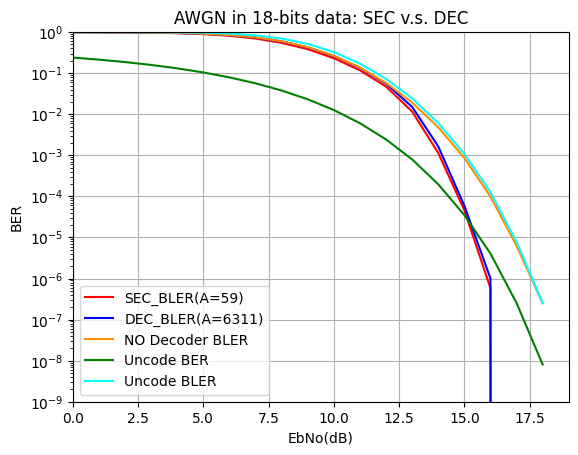

In [20]:
two_d_BLER59=plt.plot( EbNodB_range, two_d_array_bler59,'r',label="SEC_BLER(A=59)")
two_d_BLER6311=plt.plot( EbNodB_range, two_d_array_bler6311,'b',label="DEC_BLER(A=6311)")
only_q6311=plt.plot( EbNodB_range, q_ber6311, color='#FF8C00',label="NO Decoder BLER")
uncode_ber_line=plt.plot(EbNodB_range,uncode_ber,'g',label="Uncode BER")
uncode_bLer_line=plt.plot(EbNodB_range,uncode_bler,color='#00FFFF',label="Uncode BLER")


plt.legend()
plt.axis([0, itr, 1e-9, 1])
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('EbNo(dB)')
plt.ylabel('BER')
plt.grid(True)
plt.title('AWGN in 18-bits data: SEC v.s. DEC')
plt.savefig("AWGN in 18bits SEC vs DEC")
plt.show()

In [21]:
import numpy as np

threshold = 0.5

# 生成漢明碼的生成矩陣 G 和校驗矩陣 H (以 (7,4) 漢明碼為例)
def generate_hamming_matrices():
    G = np.array([
        [1, 0, 0, 0, 1, 1, 0],
        [0, 1, 0, 0, 1, 0, 1],
        [0, 0, 1, 0, 0, 1, 1],
        [0, 0, 0, 1, 1, 1, 1]
    ])
    
    H = np.array([
        [1, 1, 0, 1, 1, 0, 0],
        [1, 0, 1, 1, 0, 1, 0],
        [0, 1, 1, 1, 0, 0, 1]
    ])
    return G, H

# 對訊息進行漢明編碼
def hamming_encode(message, G):
    msg = np.array(message, dtype=int)
    codeword = np.mod(msg @ G, 2)
    return codeword

# AWGN 通道模擬（無BPSK調變，直接baseband 0/1）
def awgn_channel(codeword, snr_db):
    signal = codeword.astype(float)
    snr_linear = 10**(snr_db / 10)
    noise_std = np.sqrt(0.5 / snr_linear)
    noise = noise_std * np.random.randn(len(signal))
    received_signal = signal + noise
    received_codeword = (received_signal >= threshold).astype(int)
    return received_codeword

# 漢明碼錯誤校正
def hamming_decode(received_codeword, H):
    syndrome = np.mod(received_codeword @ H.T, 2)
    syndrome_value = syndrome[0] * 4 + syndrome[1] * 2 + syndrome[2]
    
    error_patterns = {
        0: [0, 0, 0, 0, 0, 0, 0],
        1: [0, 0, 0, 0, 0, 0, 1],
        2: [0, 0, 0, 0, 0, 1, 0],
        3: [0, 0, 0, 0, 1, 0, 0],
        4: [0, 0, 0, 1, 0, 0, 0],
        5: [0, 0, 1, 0, 0, 0, 0],
        6: [0, 1, 0, 0, 0, 0, 0],
        7: [1, 0, 0, 0, 0, 0, 0]
    }
    
    error = error_patterns.get(syndrome_value, [0, 0, 0, 0, 0, 0, 0])
    corrected_codeword = np.mod(received_codeword + error, 2)
    decoded_message = corrected_codeword[:4]
    return decoded_message

# 產生隨機的4-bit message
def generate_random_message():
    return np.random.randint(0, 2, size=4)

### 主程式：模擬不同SNR下的BLER
def simulate_bler():
    G, H = generate_hamming_matrices()
    
    snr_range = range(0, 19)  # SNR 0~18 dB
    num_trials = 12000000  # 每個SNR重複模擬次數
    hamming_bler_list = []
    ### uncode_bler_list = []
    
    for snr_db in snr_range:
        hamming_error_count = 0
        ### uncode_error_count = 0
        total_blocks = 0
        
        for _ in range(num_trials):
            message = generate_random_message()

            # 編碼傳輸
            codeword = hamming_encode(message, G)
            received_codeword = awgn_channel(codeword, snr_db)

            ## 不編碼直接傳
            ### uncode_received = awgn_channel(message, snr_db)
            # Uncoded BLER: 只要4-bit裡有1個錯，整個block算錯
            ### if np.any(uncode_received != message):
                ### uncode_error_count += 1

            # Hamming BLER: 解碼完還原訊息，4-bit裡有1個錯，整個block算錯
            decoded_message = hamming_decode(received_codeword, H)
            if np.any(decoded_message != message):
                hamming_error_count += 1

            
        
        
        hamming_bler = hamming_error_count / num_trials
        hamming_bler_list.append(hamming_bler)
        ### uncode_bler = uncode_error_count / num_trials
        ### uncode_bler_list.append(uncode_bler)
        
        print(f"SNR = {snr_db} dB, Hamming BLER = {hamming_bler:.6f}")

    return snr_range,  hamming_bler_list

if __name__ == "__main__":
    snr_range, hamming_bler_list = simulate_bler()
    print("Hamming BLER:", hamming_bler_list)


SNR = 0 dB, Hamming BLER = 0.717570
SNR = 1 dB, Hamming BLER = 0.674873
SNR = 2 dB, Hamming BLER = 0.622919
SNR = 3 dB, Hamming BLER = 0.562386
SNR = 4 dB, Hamming BLER = 0.492774
SNR = 5 dB, Hamming BLER = 0.415132
SNR = 6 dB, Hamming BLER = 0.332487
SNR = 7 dB, Hamming BLER = 0.250421
SNR = 8 dB, Hamming BLER = 0.174002
SNR = 9 dB, Hamming BLER = 0.110047
SNR = 10 dB, Hamming BLER = 0.061699
SNR = 11 dB, Hamming BLER = 0.029844
SNR = 12 dB, Hamming BLER = 0.012116
SNR = 13 dB, Hamming BLER = 0.003953
SNR = 14 dB, Hamming BLER = 0.000994
SNR = 15 dB, Hamming BLER = 0.000178
SNR = 16 dB, Hamming BLER = 0.000019
SNR = 17 dB, Hamming BLER = 0.000001
SNR = 18 dB, Hamming BLER = 0.000000
Hamming BLER: [0.71756975, 0.6748733333333333, 0.6229188333333333, 0.5623861666666666, 0.49277408333333333, 0.415132, 0.3324865, 0.25042133333333333, 0.17400208333333333, 0.1100465, 0.061698916666666666, 0.0298445, 0.012115916666666667, 0.003952666666666667, 0.0009938333333333333, 0.000178, 1.8833333333333

In [23]:
print(two_d_array_bler59)
print(two_d_array_bler6311)
print(hamming_bler_list)
print(uncode_bler)


[0.9952360833333334, 0.9911691666666667, 0.9833233333333333, 0.9684480833333333, 0.9410216666666666, 0.8925355, 0.8138943333333334, 0.6979710833333334, 0.5484469166666667, 0.38383125, 0.23204258333333333, 0.11767483333333334, 0.047189916666666665, 0.01165025, 0.0011394166666666666, 4.608333333333333e-05, 5.833333333333333e-07, 0.0, 0.0]
[0.99598675, 0.9925359166666666, 0.986091, 0.9738801666666667, 0.9513575, 0.9108980833333333, 0.8427209166666667, 0.7374385833333333, 0.5937675833333333, 0.42591925, 0.26331641666666666, 0.13565683333333334, 0.05563908333333333, 0.015098416666666666, 0.0016465833333333332, 5.941666666666667e-05, 1e-06, 0.0, 0.0]
[0.71756975, 0.6748733333333333, 0.6229188333333333, 0.5623861666666666, 0.49277408333333333, 0.415132, 0.3324865, 0.25042133333333333, 0.17400208333333333, 0.1100465, 0.061698916666666666, 0.0298445, 0.012115916666666667, 0.003952666666666667, 0.0009938333333333333, 0.000178, 1.8833333333333335e-05, 1.25e-06, 0.0]
[0.9997945833333334, 0.9994155

In [ ]:
##-------------------------------------
## 由於模擬時間過久
## infer 為根據曲線趨勢所評估計算的數據
##-------------------------------------
infer_59_1 =   5.8333e-09            ## 7.38e-09
infer_59_2 =   4.861e-11             ## 9.33e-11
infer_6311_1 =  1.25e-08             ## 1.68e-08
infer_6311_2 =  1.25e-10             ## 2.83e-10
infer_hamming_1 =  5e-08             ## 8.29e-8
two_d_array_bler59 = [0.9952360833333334, 0.9911691666666667, 0.9833233333333333, 0.9684480833333333, 0.9410216666666666, 0.8925355, 0.8138943333333334, 0.6979710833333334, 0.5484469166666667, 0.38383125, 0.23204258333333333, 0.11767483333333334, 0.047189916666666665, 0.01165025, 0.0011394166666666666, 4.608333333333333e-05, 5.833333333333333e-07, infer_59_1 , infer_59_2]
two_d_array_bler6311 = [0.99598675, 0.9925359166666666, 0.986091, 0.9738801666666667, 0.9513575, 0.9108980833333333, 0.8427209166666667, 0.7374385833333333, 0.5937675833333333, 0.42591925, 0.26331641666666666, 0.13565683333333334, 0.05563908333333333, 0.015098416666666666, 0.0016465833333333332, 5.941666666666667e-05, 1e-06, infer_6311_1, infer_6311_2]
hamming_bler_list = [0.71756975, 0.6748733333333333, 0.6229188333333333, 0.5623861666666666, 0.49277408333333333, 0.415132, 0.3324865, 0.25042133333333333, 0.17400208333333333, 0.1100465, 0.061698916666666666, 0.0298445, 0.012115916666666667, 0.003952666666666667, 0.0009938333333333333, 0.000178, 1.8833333333333335e-05, 1.25e-06, infer_hamming_1]
uncode_bler = [0.9997945833333334, 0.9994155, 0.9983510833333333, 0.9953513333333334, 0.987258, 0.9670854166666667, 0.9223163333333333, 0.8361081666666667, 0.6975836666666667, 0.5161783333333333, 0.3266328333333333, 0.17160841666666668, 0.07282333333333334, 0.024377416666666665, 0.006089333333333334, 0.0010896666666666667, 0.00012575, 7.833333333333333e-06, 2.5e-07]


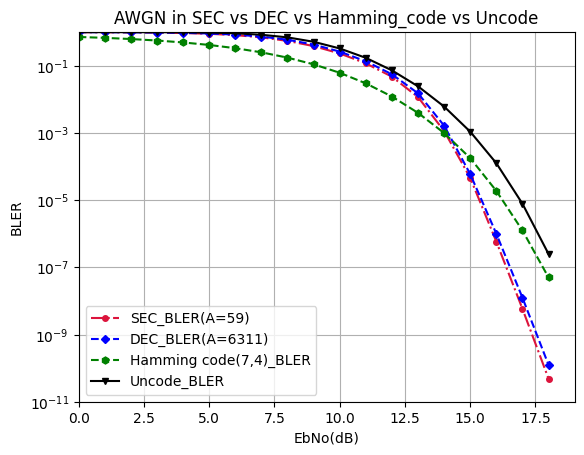

In [50]:
two_d_BLER59=plt.plot( EbNodB_range, two_d_array_bler59,marker='o',linestyle='-.',color='#DC143C',markersize=4,label="SEC_BLER(A=59)")
two_d_BLER6311=plt.plot( EbNodB_range, two_d_array_bler6311,marker='D', linestyle='--',color='#0000FF',markersize=4,label="DEC_BLER(A=6311)")
hamming=plt.plot(EbNodB_range, hamming_bler_list , marker='h', linestyle='--',color='#008000',markersize=5,label="Hamming code(7,4)_BLER")
uncode_bLer_line=plt.plot(EbNodB_range,uncode_bler,marker='v', linestyle='-', color='#000000',markersize=5,label="Uncode_BLER")


plt.legend()
plt.axis([0, itr, 1e-11, 1])
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('EbNo(dB)')
plt.ylabel('BLER')
plt.grid(True)
plt.title('AWGN in SEC vs DEC vs Hamming_code vs Uncode')
plt.savefig("AWGN in 18bits SEC vs DEC vs Hamming_code vs Uncode")
plt.show()

In [93]:
import numpy as np

threshold = 0.5

# 生成漢明碼的生成矩陣 G 和校驗矩陣 H (以 (7,4) 漢明碼為例)
def generate_hamming_matrices():
    G = np.array([
        [1, 0, 0, 0, 1, 1, 0],
        [0, 1, 0, 0, 1, 0, 1],
        [0, 0, 1, 0, 0, 1, 1],
        [0, 0, 0, 1, 1, 1, 1]
    ])
    
    H = np.array([
        [1, 1, 0, 1, 1, 0, 0],
        [1, 0, 1, 1, 0, 1, 0],
        [0, 1, 1, 1, 0, 0, 1]
    ])
    return G, H

# 對訊息進行漢明編碼
def hamming_encode(message, G):
    msg = np.array(message, dtype=int)
    codeword = np.mod(msg @ G, 2)
    return codeword

# AWGN 通道模擬（無BPSK調變，直接baseband 0/1）
def awgn_channel(codeword, snr_db):
    signal = codeword.astype(float)
    snr_linear = 10**(snr_db / 10)
    noise_std = np.sqrt(0.5 / snr_linear)
    noise = noise_std * np.random.randn(len(signal))
    received_signal = signal + noise
    received_codeword = (received_signal >= threshold).astype(int)
    return received_codeword

# 漢明碼錯誤校正
def hamming_decode(received_codeword, H):
    syndrome = np.mod(received_codeword @ H.T, 2)
    syndrome_value = syndrome[0] * 4 + syndrome[1] * 2 + syndrome[2]
    
    error_patterns = {
        0: [0, 0, 0, 0, 0, 0, 0],
        1: [0, 0, 0, 0, 0, 0, 1],
        2: [0, 0, 0, 0, 0, 1, 0],
        3: [0, 0, 0, 0, 1, 0, 0],
        4: [0, 0, 0, 1, 0, 0, 0],
        5: [0, 0, 1, 0, 0, 0, 0],
        6: [0, 1, 0, 0, 0, 0, 0],
        7: [1, 0, 0, 0, 0, 0, 0]
    }
    
    error = error_patterns.get(syndrome_value, [0, 0, 0, 0, 0, 0, 0])
    corrected_codeword = np.mod(received_codeword + error, 2)
    decoded_message = corrected_codeword[:4]
    return decoded_message

# 產生隨機的4-bit message
def generate_random_message():
    return np.random.randint(0, 2, size=4)

### 主程式：模擬不同SNR下的BLER
def simulate_bler():
    G, H = generate_hamming_matrices()
    
    snr_range = range(0, 19)  # SNR 0~18 dB
    num_trials = 1000000  # 每個SNR重複模擬次數
    hamming_bler_list = []
    uncode_bler_list = []
    
    for snr_db in snr_range:
        hamming_error_count = 0
        uncode_error_count = 0
        total_blocks = 0
        
        for _ in range(num_trials):
            message = generate_random_message()

            # 編碼傳輸
            codeword = hamming_encode(message, G)
            received_codeword = awgn_channel(codeword, snr_db)

            # 不編碼直接傳
            uncode_received = awgn_channel(message, snr_db)

            # Uncoded BLER: 只要4-bit裡有1個錯，整個block算錯
            if np.any(uncode_received != message):
                uncode_error_count += 1

            # Hamming BLER: 解碼完還原訊息，4-bit裡有1個錯，整個block算錯
            decoded_message = hamming_decode(received_codeword, H)
            if np.any(decoded_message != message):
                hamming_error_count += 1

            total_blocks += 1
        
        uncode_bler = uncode_error_count / total_blocks
        hamming_bler = hamming_error_count / total_blocks
        
        uncode_bler_list.append(uncode_bler)
        hamming_bler_list.append(hamming_bler)

        print(f"SNR = {snr_db} dB, Uncoded BLER = {uncode_bler:.6f}, Hamming BLER = {hamming_bler:.6f}")

    return snr_range, uncode_bler_list, hamming_bler_list

if __name__ == "__main__":
    snr_range, uncode_bler_list, hamming_bler_list = simulate_bler()
    print("Uncoded BLER:", uncode_bler_list)
    print("Hamming BLER:", hamming_bler_list)


SNR = 0 dB, Uncoded BLER = 0.665955, Hamming BLER = 0.716916
SNR = 1 dB, Uncoded BLER = 0.618932, Hamming BLER = 0.674985
SNR = 2 dB, Uncoded BLER = 0.562101, Hamming BLER = 0.621972
SNR = 3 dB, Uncoded BLER = 0.499295, Hamming BLER = 0.563497
SNR = 4 dB, Uncoded BLER = 0.430538, Hamming BLER = 0.492915
SNR = 5 dB, Uncoded BLER = 0.357137, Hamming BLER = 0.414948
SNR = 6 dB, Uncoded BLER = 0.280373, Hamming BLER = 0.332910
SNR = 7 dB, Uncoded BLER = 0.207851, Hamming BLER = 0.250845
SNR = 8 dB, Uncoded BLER = 0.143082, Hamming BLER = 0.174040
SNR = 9 dB, Uncoded BLER = 0.089699, Hamming BLER = 0.109740
SNR = 10 dB, Uncoded BLER = 0.049708, Hamming BLER = 0.061721
SNR = 11 dB, Uncoded BLER = 0.023930, Hamming BLER = 0.029908
SNR = 12 dB, Uncoded BLER = 0.009736, Hamming BLER = 0.012158
SNR = 13 dB, Uncoded BLER = 0.003225, Hamming BLER = 0.003999
SNR = 14 dB, Uncoded BLER = 0.000816, Hamming BLER = 0.000958
SNR = 15 dB, Uncoded BLER = 0.000168, Hamming BLER = 0.000193
SNR = 16 dB, Uncod